# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [3]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test,(10000, 784))

## Task 3: Adding Noise
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [4]:
noise_factor = 0.9

x_train_noisy = x_train + np.random.rand(60000, 784)*noise_factor
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.rand(10000, 784)*noise_factor
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

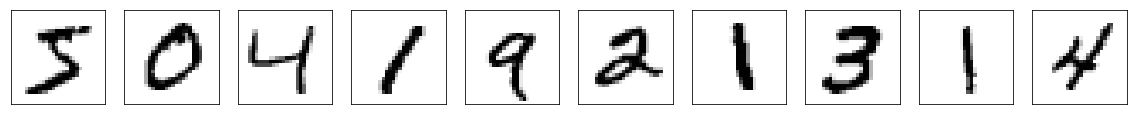

In [43]:
def plot(x, p, labels=False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
plot(x_train, None)

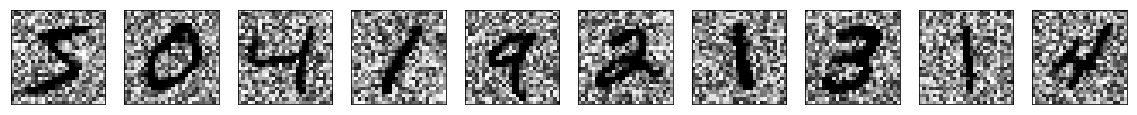

In [7]:
plot(x_train_noisy, None)

## Task 4: Building and Training a Classifier
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [47]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [48]:
history=classifier.fit(
    x_train, y_train,
    batch_size=512,
    epochs=5
)

Epoch 1/5
60000/60000 [==============================] - 5s 92us/step - loss: 0.4281 - acc: 0.8787
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1380 - acc: 0.9598
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0924 - acc: 0.9724
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0661 - acc: 0.9801
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0496 - acc: 0.9851


In [49]:
loss, accuracy = classifier.evaluate(x_test, y_test)
print(accuracy)

10000/10000 [==============================] - 1s 115us/step
0.9778


In [50]:
loss, accuracy = classifier.evaluate(x_test_noisy, y_test)
print(accuracy)

10000/10000 [==============================] - 1s 111us/step
0.2421


## Task 5: Building the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [51]:
Input_image = Input(shape=(784,))

encoded = Dense(64, activation='relu')(Input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(Input_image, decoded)
autoencoder.compile(
    optimizer = 'adam',
    loss ='binary_crossentropy',
    metrics=['accuracy']
)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


## Task 6: Training the Autoencoder
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [52]:
autoencoder.fit(
    x_train_noisy, x_train,
    validation_split=0.2,
    batch_size=512,
    epochs=100,
    verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Training Done')

0.259 _ 0.224 _ 0.198 _ 0.181 _ 0.169 _ 0.160 _ 0.152 _ 0.146 _ 0.140 _ 0.136 _ 0.132 _ 0.129 _ 0.126 _ 0.124 _ 0.122 _ 0.120 _ 0.119 _ 0.117 _ 0.116 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _  _ 
Training Done


## Task 7: Denoised Images
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [53]:
predictions = autoencoder.predict(x_test_noisy)

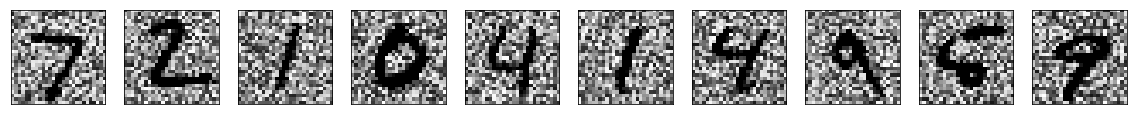

In [54]:
plot(x_test_noisy, None)

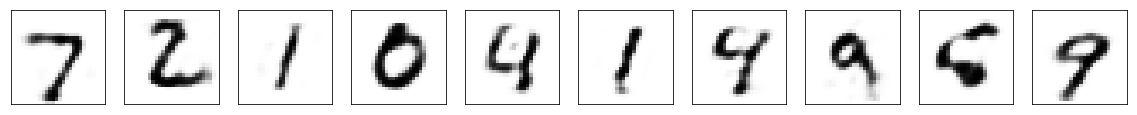

In [55]:
plot(predictions, None)

In [56]:
loss, accuracy = classifier.evaluate(predictions, y_test)
print(accuracy)

10000/10000 [==============================] - 1s 130us/step
0.956


## Task 8: Composite Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [57]:
input_image = Input(shape=(784,))

x=autoencoder(input_image)
y=classifier(x)

denoise_and_classify = Model(input_image, y)

In [58]:
predictions = denoise_and_classify.predict(x_test_noisy)

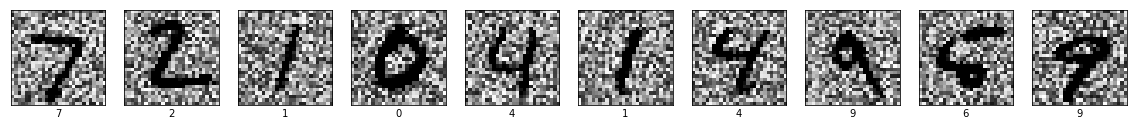

In [59]:
plot(x_test_noisy, predictions, True)

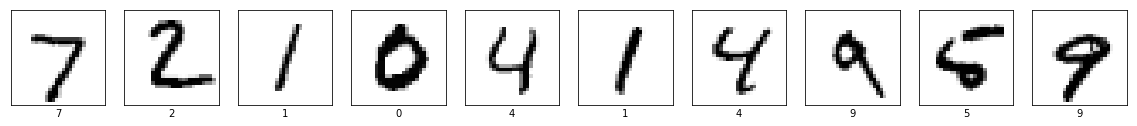

In [60]:
plot(x_test, to_categorical(y_test), True)